## Introduction

The purpose of the project is to demonstrate the data analysis process particularly using Numpy and Pandas library of Python. I have used the Titanic Dataset.The dataset has information about 891 passangers. Data includes information about their survival, number of relatives aboard, class of travel, ticket number, Fare etc. 

Questions that I have attempted to address by this data analysis process are:
 - Was the survival related to gender of the passanger?
 - Was the survival related to class in which passanger was traveling?
 - Did having relatives aboard affect the survival?
 - Did Age of the passanger affect the survival?
 
The questions stem from the intution. Thought process behind the questions has been summarized below:
 - Gender might affect the survival. Few of the reason I believe so includes the general belief that males have relatively higher physical strength. Second, during rescue operation, children and women might have given the priority. 
 - People traveling in higher class might have more time to save themselves since they are at higher floor in the ship.
 - Having relatives with you might make someone more concerned about them and less independent in saving themselves.
 - Elders might find it difficult to get themselves evacuated. Similary, kids might not be able to help themselves much. There can be many reasons why age might affect the survival.
 

In [65]:
# Numpy, Pandas, Matplotlib, os, math and scipy modules are imported
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import statsmodels.graphics.mosaicplot as stat
import math
import scipy.stats as stats

#Checked the current working directory and changed it to the location where dataset is located.
os.getcwd()
os.chdir("C:\\Users\\Trushit\\Desktop\\Trushit\\Udacity\\P2")

#imported dataset as pandas dataframe. dtype attribute is used to convert columns to appropriate datatype.
titanic = pd.read_csv("titanic-data.csv",dtype={ "Pclass":"category","Survived":"category", "Name":"str","Ticket":"str","Cabin":"str","Embarked":"str"})
titanic.info()
titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null category
Pclass         891 non-null category
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: category(2), float64(2), int64(3), object(5)
memory usage: 71.5+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Info() method gave a bird eye view of the data. We can see that we have 150, 687 and 2 NULL entries in Age, Cabin and Embarked column respectively. We can also see that we have our variables in the desired type that we enforced using dtype attribute while importing the data.

Missing values of the age variable might affect our analysis while answering question 4. There can be multiple reasons for the age data not be available such as missing the entry or passanger not mentioning their age at all. Age of the person cannot be approximated by methods such as averaging the values from near by colums or anything since it can be anything. Thus, we will ignore the rows corresponding to missing age values while performing the analysis to answer question 4. 

Cabin and Embarked variables are not expected to be the part of analysis. Thus, missing values for these variable does not affect our analysis.

## Visual Exploration of Data

### Mosaic Plot for Gender and Survival 

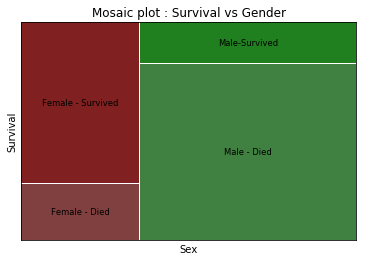

In [68]:
labelizer1 = lambda k: {("male","0"):"Male - Died",("male","1"):"Male-Survived",("female","0"):"Female - Died",("female","1"):"Female - Survived"}[k]
stat.mosaic(titanic,['Sex','Survived'],labelizer = labelizer1,axes_label=False,title="Mosaic plot : Survival vs Gender")
plt.xlabel("Sex")
plt.ylabel("Survival")
plt.show()

Mosaic plot is one of the ways to explore relation between categorical variables.

From the above plot following points can be noted:
- Total number of males is more than total number of females.
- Proportion of male who survived is less than proportion of female who survived. This visual observation will be tested using Hypothesis Testing.

### Mosaic Plot for Passenger Class and Survival

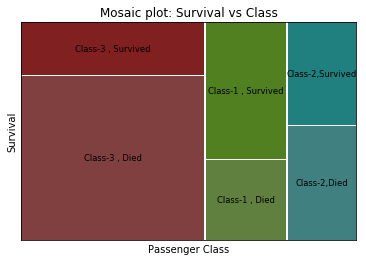

In [70]:
labelizer2 = lambda k: {('1','1'):"Class-1 , Survived",('1','0'):"Class-1 , Died",('2','1'):"Class-2,Survived",('2','0'):"Class-2,Died",('3','1'):"Class-3 , Survived",('3','0'):"Class-3 , Died"}[k]
stat.mosaic(titanic,['Pclass','Survived'],labelizer = labelizer2,axes_label=False, title="Mosaic plot: Survival vs Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival")
plt.show()

From the above plot following points can be noted:
- Total number of passengers traveling in class 3 is maximum. It is difficult to visually determine if more passengers are travelling in class 1 or in class 2. However, it appears that more passengers are travelling in class 1 than in class 2.

- Proportion of passengers who survived while traveling in class 1 and class 2 is considerably more than proportion of people who survived in class 3. It is also visible that proportion of people who survived in class 1 is more than that of class 2.

### Stacked Histogram : Distribution of Number of Relatives and Proportion of Survival

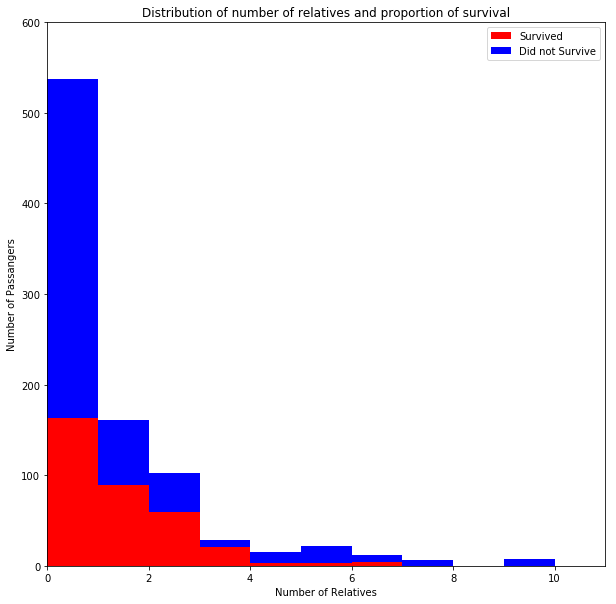

In [72]:
titanic["relatives"] = titanic["SibSp"] + titanic["Parch"]
survived = titanic[titanic["Survived"]=="1"]["relatives"]
N_survived = titanic[titanic["Survived"]=="0"]["relatives"]

histo=plt.figure(1,figsize=(10,10))
px=histo.add_subplot(111)
hg=px.hist([survived,N_survived], stacked=True, bins=10,color=["r","b"],label=["Survived","Did not Survive"])
px.axis([0,11,0,600])
px.set_title('Distribution of number of relatives and proportion of survival')
px.set_xlabel("Number of Relatives")
px.set_ylabel("Number of Passangers")
plt.legend()
plt.show()



New variable called `relatives` is formed by adding `SibSp` and `Parch`. This gives us total number of relatives of the traveler aboard. Number of relatives is considered as a continous variable for plotting the histogram. We can see that the distribution has a positive skew. It is not clear that there is a variation is the proportion of survival. Even if there is some variable, further analysis is required to ascertain that proportion significantly varies with number of relatives. 

Let us plot Boxplot to see the distribution of relatives based on Survival.

### Parallel BoxPlot : Distribution of number of relatives based on Survival

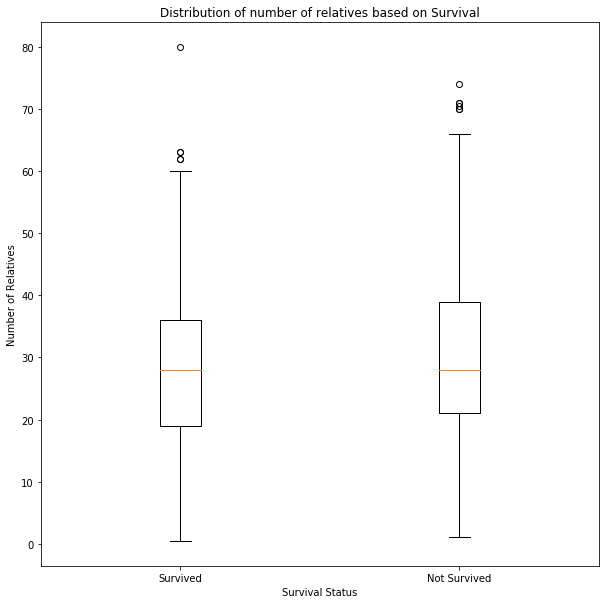

In [73]:
survived_pass=titanic[(titanic["relatives"].notnull()) & (titanic["Survived"]=="1")]
N_survived_pass=titanic[(titanic["relatives"].notnull()) & (titanic["Survived"]=="0")]
data_to_plt=[survived_pass["relatives"],N_survived_pass["relatives"]]

# Create a figure instance
fig = plt.figure(1,figsize=(10,10))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)

ax.set_title('Distribution of number of relatives based on Survival')
ax.set_xlabel('Survival Status')
ax.set_ylabel('Number of Relatives')

ax.set_xticklabels(['Survived', 'Not Survived'])

plt.show()

It can be seen that there is no difference in survival status based on the number of relatives that person has aboard.WE can conclude this because people who survived and that who could not survive has similar distribution and similar variance.

### Parallel BoxPlot: Distribution of Age based on Survival

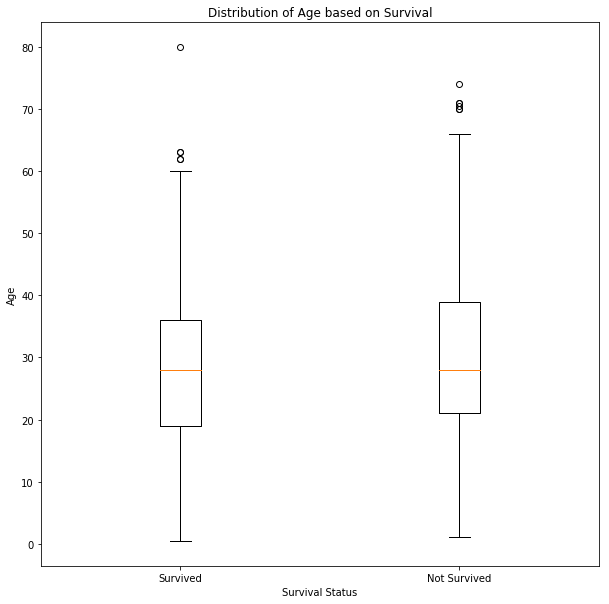

In [75]:
survived_age = titanic[(titanic["Age"].notnull()) & (titanic["Survived"]=="1")]
N_survived_age = titanic[(titanic["Age"].notnull()) & (titanic["Survived"]=="0")]
data_to_plot = [survived_age["Age"],N_survived_age["Age"]]


# Create a figure instance
fig = plt.figure(1,figsize=(10,10))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)

ax.set_xticklabels(['Survived', 'Not Survived'])
ax.set_title('Distribution of Age based on Survival')
ax.set_xlabel('Survival Status')
ax.set_ylabel('Age')
plt.show()

Parallel Box Plot is appropriate when we want to compare the distribution of two categories over a single continous variable. Here we want to compare how is survival distributed over the age variable. 

From the above box plot, we can see that there is no considerable difference between distribution of age of people who could survive and who could not. In other words, age does not have considerable effect on survival of passengers. This can be tested using Statistical Testing Methods.

From predictive modeling perspective, we can say that age does not have any predictive power and might not be the appropriate feature for modeling.

## Statistical Analysis

We have explored the data visually to answer the questions that have been posed earlier. Visual exploration are helpful to get the insights on the data. But they are not the right tool to derive inference. Thus, inference tests are needed to be performed. Following tests will be performed:
- Test of proportion to determine if there is the significant difference in the proportion of survived male and survived female.
- Chi Square goodness of fit test to determine if there is the significant difference in the proportion of survived male and survived female.
- Chi Square goodness of fit test to determine if there is the significant difference in the proportion of people who survived while traveling in class 1, proportion of people who survived while traveling in class 2,proportion of people who survived while traveling in class 3.

Further, decision tree will be used to model the relation between passenger class and the survival status.

### Test of Proportion : Z - test

Test of Proportion can be used to determine if there is a significant difference between two proportions.

Null Hypothesis $H_0$ : There is no significant difference between proportion of male $p_{male}$ that survived and proportion of female $p_{female}$ that survived.

Alternative Hypothesis $H_A$ : There is a significant difference between proportion of male that survived and proportion of female that survived.

$H_0$ : $p_{male} = p_{female}$

$H_A$ : $p_{male} \neq p_{female}$


In [308]:
#Calculate of total males, total females and total number of passengers traveling
total_males = len(titanic[titanic["Sex"]=="male"])
total_females = len(titanic[titanic["Sex"]=="female"])
total_travelrs = total_males + total_females

#Calculation of Overall Survival Proportion, Proportion of Male Survive and Proportion of Female Survived
survival_prop = len(titanic[titanic["Survived"]=="1"])/total_travelrs
survived_males=len(titanic[(titanic["Sex"]=="male") & (titanic["Survived"]=="1")])
survived_females=len(titanic[(titanic["Sex"]=="female") & (titanic["Survived"]=="1")])
prop_m_survived = survived_males/total_males
prop_f_survived = survived_females/total_females

#Calculation of Test Statistic
prop_hat = (prop_m_survived + prop_f_survived) / (total_males+total_females)
test_statistic = ((prop_m_survived - prop_f_survived) - 0)/math.sqrt(prop_hat*(1-prop_hat)*((1/total_males)+(1/total_females)))
print(test_statistic)

-244.1432220693172


Our Test Statistic is -244.14 which is below critical value if -1.96. Thus, we reject the Null Hypothesis.

Thus, there is a significant difference between proportion of male who survived and proportion of female who survived

### Chi Square Goodness of Fit :

Our hypothesis remains same as above. Chi Square Goodness of Fit is another statistical test performed to confirm the result we obtained above.

In [309]:
expected_males = survival_prop * total_males
array_observed = [prop_m_survived,prop_f_survived]

expected_females = survival_prop * total_females
array_expected = [expected_males,expected_females]

crit = stats.chi2.ppf(q = 0.95, df = 1)   
print(crit)
stats.chisquare(f_obs=array_observed,f_exp=array_expected)



3.84145882069


Power_divergenceResult(statistic=340.14283691511071, pvalue=5.9396831972092382e-76)

We can see that test statistic is 340 which is greater than critical value of 3.84. We can reject the Null Hypothesis. 

### Chi Square Goodness of Fit :

Chi Square Goodness of Fit can be used to determine if there is a significant difference between two proportions.

Null Hypothesis $H_0$ : There is no significant difference between proportion of passangers survived while traveling in class 1,proportion of passangers survived while traveling in class 2,proportion of passangers survived while traveling in class 3.

Alternative Hypothesis $H_A$ : There is a significant difference between proportion of passangers survived while traveling in class 1,proportion of passangers survived while traveling in class 2,proportion of passangers survived while traveling in class 3.


In [269]:
nos_1 =len(titanic[titanic["Pclass"]=="1"])
nos_2 =len(titanic[titanic["Pclass"]=="2"])
nos_3 =len(titanic[titanic["Pclass"]=="3"])
nos_1_s = len(titanic[(titanic["Pclass"]=="1") & (titanic["Survived"]=="1")])
nos_2_s =len(titanic[(titanic["Pclass"]=="2") & (titanic["Survived"]=="1")])
nos_3_s=len(titanic[(titanic["Pclass"]=="3") & (titanic["Survived"]=="1")])
nos_1_exp = survival_prop * nos_1
nos_2_exp = survival_prop * nos_2
nos_3_exp = survival_prop * nos_3
array_exp = [nos_1_exp,nos_2_exp,nos_3_exp]
array_obs = [nos_1_s,nos_2_s,nos_3_s]


print(crit)
stats.chisquare(f_obs=array_obs,f_exp=array_exp)

3.84145882069


Power_divergenceResult(statistic=63.396245597723173, pvalue=1.7126955990497913e-14)

We can see that test statistic is 63 which is greater than critical value of 3.84. We can reject the Null Hypothesis. Thus, there is a significant difference between the survival rate of people depending upon the class in which they were travelling.

### Decision Tree used as classifier:

Following code splits the dataset into training and testing sets,fits the decision tree model using trainging data, predicts the survival status and calculates the accuracy. Accuracy is found to be 70%. We need to test more algorithms to choose the correct one. This shall be done in subsequent iterations of the project.

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
train_set,test_set = train_test_split(titanic,test_size=0.25)
from sklearn import tree
clf=tree.DecisionTreeClassifier()
X=np.array(train_set["Pclass"])
X=X[:,None]
Y=train_set["Survived"]
X_t=np.array(test_set["Pclass"])
X_t=X_t[:,None]
Y_t=test_set["Survived"]
clf_fit=clf.fit(X,Y)
clf_pred=clf.predict(X_t)
accuracy_score(Y_t,clf_pred)

0.70852017937219736

### Answers to questions posed

  - Yes. Survival depends upon the gender of the passenger. In fact, proportion of survival of females is more than that of males.
  - Yes. Survival depends upon the class in which the passenger was travelling. 
  - Stacked histogram did not help us conclude anything clearly. However, from boxplot we can conclude with resonable confidence that survival is not affected by number of relatives aboard.
  - Age does not appear to be related to survival. This is evident from the visual distribution.
  
It is important to note that relationship between survival and age and that between survival and number of relatives has been explored visually. Further statistical test might be required to acertain the conclusion.

It is also important to note that missing values have been completely ignored. 

Decision Tree has a accuracy of only 70%. This certainly requires further improvement. It would be interesting to try various models and see which one performs well. Also, it would also be interesting to fine tune these models further to get the better accuracy.
 

### References

    1) Data Visualization : Choosing a right figure type. ( https://www.cscu.cornell.edu/news/statnews/stnews89.pdf)
    2) Mosaic Plot in Python(http://statsmodels.sourceforge.net/0.6.0/generated/statsmodels.graphics.mosaicplot.mosaic.html)
    3) Comparing Two Proportions : https://onlinecourses.science.psu.edu/stat414/node/268
    4) Decision Trees (http://scikit-learn.org/stable/modules/tree.html)
    5) Datacamp.com
    6) Matplotlib : Text (https://matplotlib.org/users/text_intro.html)